<a href="https://colab.research.google.com/github/RozitaAbdoli/credit_default_mining/blob/main/1_dataUnderstanding%2BdataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will:
* Drop irrelevant column(s) from dataset
* Rename attributes where needed
* Remove duplicate entries
* Look at the # of unique entries, attribute data types, and memory usage
* Whether there are missing values in the dataset
* Look at the dependent variable
* Look at the categories in the categorical independent variables (adjusted where needed)
* Initial look at the distribution of numeric independent variables


In [1]:
# Import relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Drive API and authenticate
from google.colab import drive
#Mount Drive to the Colab VM
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the dataset into pandas DataFrame
df = pd.read_excel("/content/drive/MyDrive/Capstone_project/credit_default.xls", sheet_name='Data')

In [4]:
#Take a look at the fist 3 rows
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [5]:
#Remove the ID column as it is unique values and is not going to help for classification
df = df.drop('ID', 1)

In [6]:
#Rename "default payment next month" column to just "Default"
df = df.rename(columns={'default payment next month': 'Default'})

In [7]:
#Now rename all numbers with the month they correspond to in the column names for better data readability
df.rename({'PAY_0':'Repay_Sept','PAY_2':'Repay_Aug','PAY_3':'Repay_July','PAY_4':'Repay_June','PAY_5':'Repay_May','PAY_6':'Repay_Apr'}, axis=1, inplace=True)
df.rename({'BILL_AMT1':'Bill_Sept','BILL_AMT2':'Bill_Aug','BILL_AMT3':'Bill_July','BILL_AMT4':'Bill_June','BILL_AMT5':'Bill_May','BILL_AMT6':'Bill_Apr'}, axis=1, inplace=True)
df.rename({'PAY_AMT1':'Pay_Sept','PAY_AMT2':'Pay_Aug','PAY_AMT3':'Pay_July','PAY_AMT4':'Pay_June','PAY_AMT5':'Pay_May','PAY_AMT6':'Pay_Apr'}, axis=1, inplace=True)

In [8]:
#Check for duplicate rows and remove them
print('before removing duplicates' , df.duplicated().sum())
df = df[~df.duplicated()]
print('after removing', df.duplicated().sum())

before removing duplicates 35
after removing 0


In [9]:
#Check number of rows and columns now
df.shape

(29965, 24)

In [10]:
#Look at the datatypes, if there are any missing values, and memory usage
df.info()
#No missing values (29965 non-null counts for all attributes)
#df.isnull().sum().sum()  #Anotehr way to check if there is any missing values (across all columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LIMIT_BAL   29965 non-null  int64
 1   SEX         29965 non-null  int64
 2   EDUCATION   29965 non-null  int64
 3   MARRIAGE    29965 non-null  int64
 4   AGE         29965 non-null  int64
 5   Repay_Sept  29965 non-null  int64
 6   Repay_Aug   29965 non-null  int64
 7   Repay_July  29965 non-null  int64
 8   Repay_June  29965 non-null  int64
 9   Repay_May   29965 non-null  int64
 10  Repay_Apr   29965 non-null  int64
 11  Bill_Sept   29965 non-null  int64
 12  Bill_Aug    29965 non-null  int64
 13  Bill_July   29965 non-null  int64
 14  Bill_June   29965 non-null  int64
 15  Bill_May    29965 non-null  int64
 16  Bill_Apr    29965 non-null  int64
 17  Pay_Sept    29965 non-null  int64
 18  Pay_Aug     29965 non-null  int64
 19  Pay_July    29965 non-null  int64
 20  Pay_June    29965 non-null  

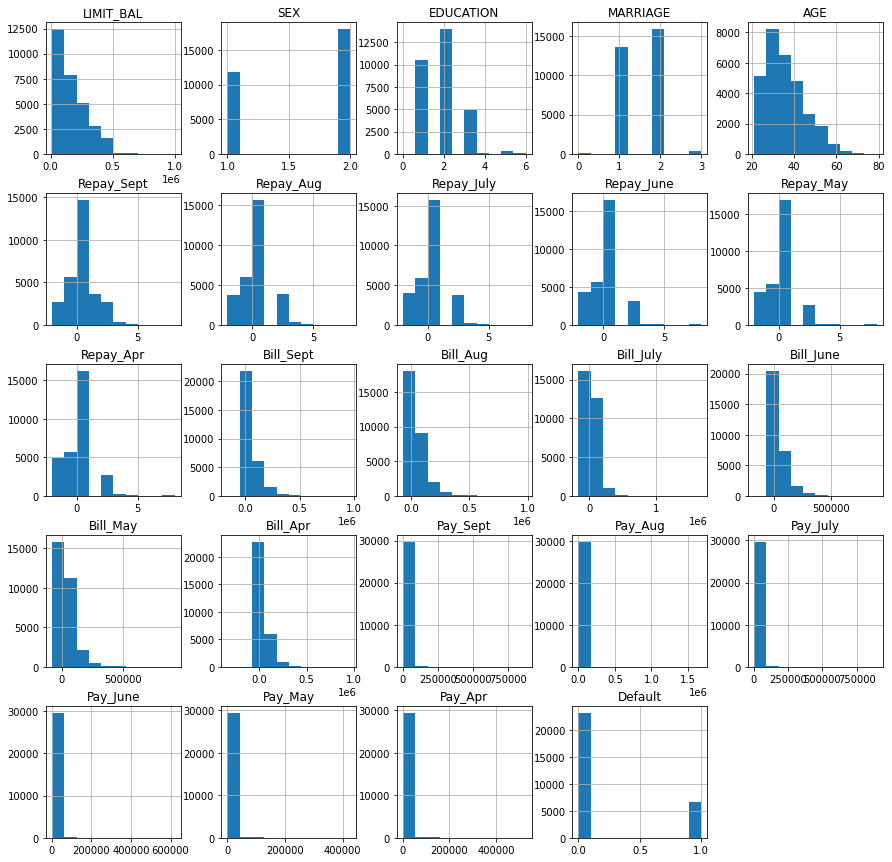

In [11]:
#Before taking a closer look at the variables individually, look at the histogram of all to get an oveall idea
df.hist(figsize=(15,15));
# Insight: All data types are int64, but some attributes are actually categorical, and not continous.

# Dependent variable
 * Default: 0 = no default; 1 = default

In [12]:
# First make sure dependent variable 'default' has only 0s (no default), and 1s (default)
df['Default'].value_counts()

0    23335
1     6630
Name: Default, dtype: int64

In [13]:
minor_class = (df['Default'] == 1).sum()/len(df)*100
major_class = (df['Default'] == 0).sum()/len(df)*100
print(round(minor_class, 2),'% of customers will default next month.')
print('If the classifier always predicts "no default", its accuracy is going to be', round(major_class, 2),'%')  
#Insight: most customers will not default (imbalanced dataset)

22.13 % of customers will default next month.
If the classifier always predicts "no default", its accuracy is going to be 77.87 %


# Categorical Independent Variables
* SEX: 1 = male; 2 = female
* EDUCATION: 1 = graduate school; 2 = university; 3 = high school; 4 = others
* MARRIAGE: 1 = married; 2 = single; 3 = others
* Repay_: History of past payment. ***Sept., Aug., July, June, May, Apr.: 

   -2 = no consumption; -1 = pay duly; 0= the use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 9 = payment delay for nine months and above

NOTE: categories -2 and 0 were not defined in the original source (Yeh and Lien, 2009), instead were explained in the source below:
Sabharwal, S. and Agrawal A. (2020). Up and Running Google AutoML and AI Platform: Building Machine Learning and NLP Models Using AutoML and AI Platform for Production Environment. BPB PUBLICATIONS. 


In [14]:
df['SEX'].value_counts()

2    18091
1    11874
Name: SEX, dtype: int64

In [15]:
df['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [16]:
# "0", "5", and "6" can be combined to category "others=4", as no additional info is available about them. 
df['EDUCATION'] = df['EDUCATION'].astype('str').replace(['0','5', '6'], '4').astype('int64')
df['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
4      468
Name: EDUCATION, dtype: int64

In [17]:
df['MARRIAGE'].value_counts()

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

In [18]:
# Yeh and Lien (2009) where this dataset came from defined only 3 categories for MARRIAGE
# But there is a 4th category "0". "0" can be combined with the "others=3" category, as no additional info is available.
df['MARRIAGE'] = df['MARRIAGE'].astype('str').replace('0', '3').astype('int64')
df['MARRIAGE'].value_counts()

2    15945
1    13643
3      377
Name: MARRIAGE, dtype: int64

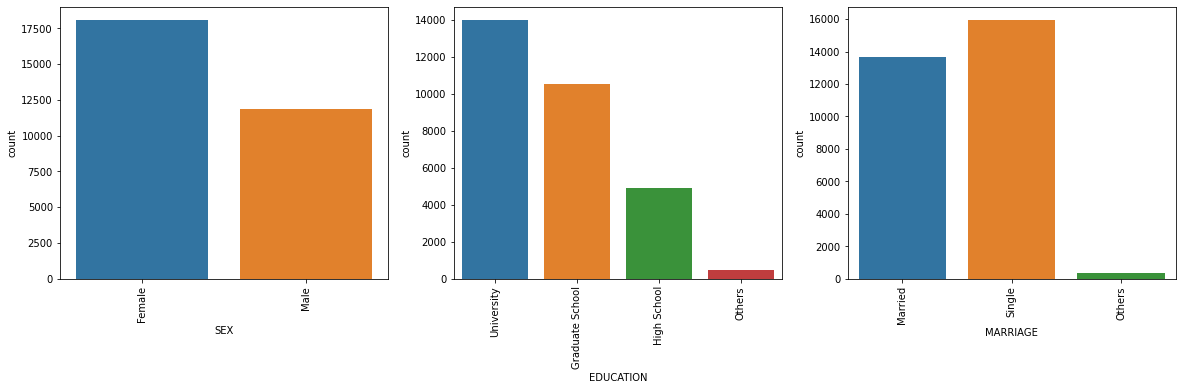

In [19]:
## Now plot categorical demographic variables: SEX, EDUCATION, and MARRIAGE
# Rename the categories so they are easier to understand in the plots
df_copy1=df.copy()
df_copy1['SEX'].replace({1:'Male',2:'Female'}, inplace=True)
df_copy1['EDUCATION'].replace({1:'Graduate School', 2:'University', 3:'High School', 4:'Others'}, inplace=True)
df_copy1['MARRIAGE'].replace({1:'Married', 2:'Single', 3:'Others'}, inplace=True)

cat_dem = df_copy1[['SEX', 'EDUCATION', 'MARRIAGE']]
fig,ax=plt.subplots(1,3,figsize=(20,5))

for cols,subplots in zip(cat_dem,ax.flatten()):
    sns.countplot(x=df_copy1[cols],ax=subplots)

    for label in subplots.get_xticklabels():
        label.set_rotation(90)

##Insights:
# 60% of customers are female
# Most customers have a bachelor's degree, followed by graduate-level degree
# Most customers are single, followed closely by married.

In [20]:
pay_df = df[['Repay_Sept', 'Repay_Aug', 'Repay_July', 'Repay_June', 'Repay_May', 'Repay_Apr']]
pay_df.apply(pd.Series.value_counts)

,Repay_Sept,Repay_Aug,Repay_July,Repay_June,Repay_May,Repay_Apr
-2,2750,3752,4055,4318,4516.0,4865.0
-1,5682,6046,5934,5683,5535.0,5736.0
0,14737,15730,15764,16455,16947.0,16286.0
1,3667,28,4,2,NaN,NaN
2,2666,3926,3819,3159,2626.0,2766.0
3,322,326,240,180,178.0,184.0
4,76,99,75,68,83.0,48.0
5,26,25,21,35,17.0,13.0
6,11,12,23,5,4.0,19.0
7,9,20,27,58,58.0,46.0


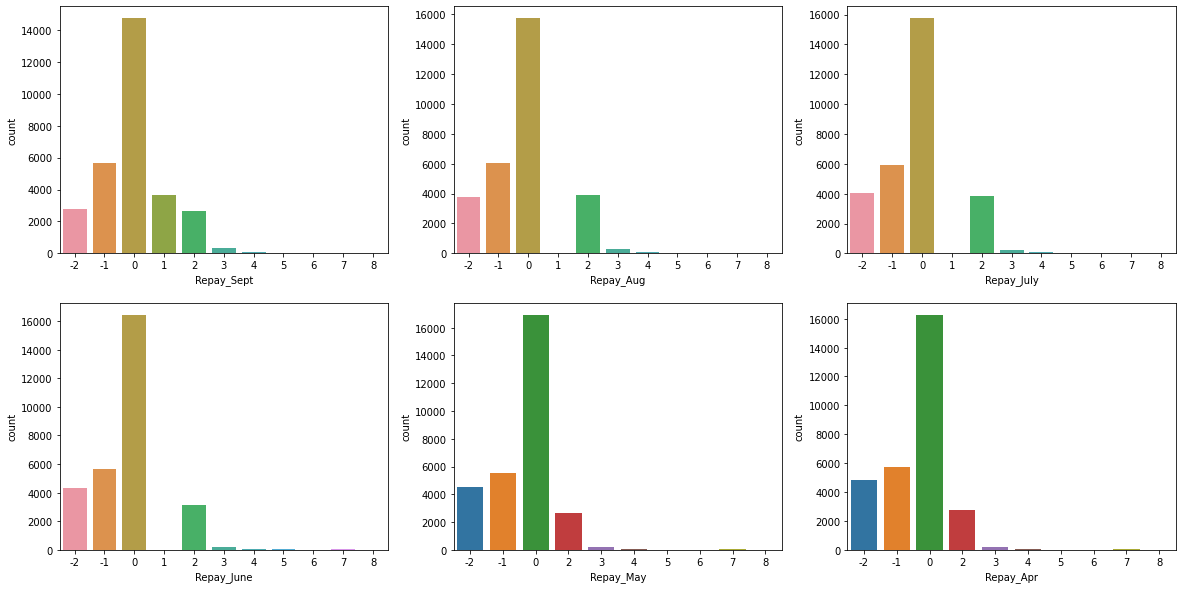

In [21]:
repay_=['Repay_Sept', 'Repay_Aug', 'Repay_July', 'Repay_June', 'Repay_May', 'Repay_Apr']
fig,ax=plt.subplots(2,3,figsize=(20,10))

for cols,subplots in zip(repay_,ax.flatten()):
    sns.countplot(x=df[cols],ax=subplots) 
#Insight: Most customers use the revolving credit(0), followed by customers who pay duly (-1), and customers who don't use their credit (-2),
 #respectively. Except September where the number of customers who were late on their payment by 1 month exceeded the customers who don't use their credit.

# Numeric Independent Variables
* LIMIT_BAL: Amount of the given credit (New Taiwan dollar=NTD)
*  AGE: in years
* BILL_AMT: Amount of bill statement. ***Sept., Aug., July, June, May, Apr.***
* PAY_AMT: Amount of previous payment. ***Sept., Aug., July, June, May, Apr.***

In [22]:
# Compute summary statistics for AGE and LIMIT_BAL.
df[['LIMIT_BAL', 'AGE']].describe()
# Customers have a credit between 10,000 and 1,000,000 NTD (~CAD $450 - $45,000)
# Customers are between 21-79 yrs old. Mean age is 35.5.

,LIMIT_BAL,AGE
count,29965.000000,29965.000000
mean,167442.005006,35.487969
std,129760.135222,9.219459
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,1000000.000000,79.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Customers')

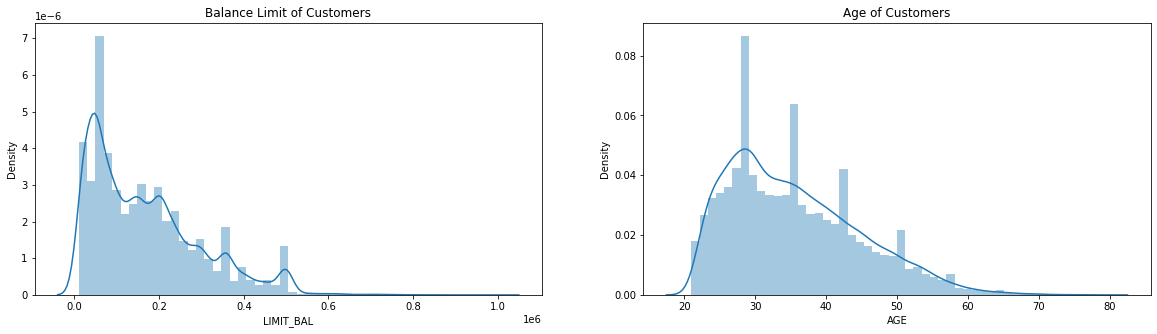

In [23]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)    #add kde=False, if want to see counts on y-axis
plt.title('Balance Limit of Customers')

plt.subplot(122)
sns.distplot(df.AGE)
plt.title('Age of Customers')

# Insight: Balance Limit of customers is skewed right, with most customers having low balance limits.
# Age is skewed right

In [24]:
# Compute summary statistics for BILL_AMT.
df[['Bill_Sept', 'Bill_Aug', 'Bill_July', 'Bill_June', 'Bill_May', 'Bill_Apr']].describe()

,Bill_Sept,Bill_Aug,Bill_July,Bill_June,Bill_May,Bill_Apr
count,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000
mean,51283.009778,49236.366294,4.706792e+04,43313.329885,40358.334390,38917.012281
std,73658.132403,71195.567392,6.937135e+04,64353.514373,60817.130623,59574.147742
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3595.000000,3010.000000,2.711000e+03,2360.000000,1787.000000,1262.000000
50%,22438.000000,21295.000000,2.013500e+04,19081.000000,18130.000000,17124.000000
75%,67260.000000,64109.000000,6.020100e+04,54601.000000,50247.000000,49252.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [25]:
# Compute summary statistics for PAY_AMT.
df[['Pay_Sept', 'Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May', 'Pay_Apr']].describe()

,Pay_Sept,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_Apr
count,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000
mean,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014
std,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000
50%,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000
75%,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [26]:
#Export the cleaned data to the Drive for the next step (EDA)
df.to_csv('/content/drive/MyDrive/Capstone_project/v2_credit_default.csv', index=False)     #encoding='utf-8'